In [1]:
import numpy as np
import pandas as pd

from datetime import datetime

from matplotlib import pyplot as plt
from matplotlib import ticker
import seaborn as sns

Не забудьте скачать [данные](https://1drv.ms/u/c/a320c9b39dd5bde2/EZXNB1leZnRFpsAYSpmz0_cBlmmT4FbiKxcwov1ehM5d6Q): в директории `./data/` должны находиться файлы `users.csv`, `appeals.csv`, `navigation.csv`

In [2]:
appealss_init = pd.read_csv("./data/appeals.csv", index_col=0)
navigation_init = pd.read_csv("./data/navigation.csv", index_col=0, header=0, names=["user_id", "dt"])

In [3]:
appeals = appealss_init.copy()
navigation = navigation_init.copy()

Проверим гипотезу: после обращения пользователи ведут себя активнее (чаще попадают в навигацию), чем до обращения

In [4]:
appeals['created_time'] = pd.to_datetime(appeals['created_time'], unit='ns')

In [5]:
appeals['created_month'] = appeals['created_time'].dt.to_period('M').dt.to_timestamp()

In [6]:
navigation['dt'] = pd.to_datetime(navigation['dt'])

In [7]:
merged = pd.merge(appeals, navigation, on="user_id", how="inner")

In [8]:
# Рассматриваем 2 недели до и после обращения
filtered = merged[(merged["dt"] >= merged["created_time"] - pd.Timedelta(days=14)) & \
       (merged["dt"] <= merged["created_time"] + pd.Timedelta(days=14))].copy()

In [9]:
# Находим разницу в днях
filtered["days_diff"] = (filtered["dt"] - filtered["created_time"]).dt.days

In [10]:
result = filtered.groupby("days_diff", as_index=False).agg(user_count=("user_id", "count")).sort_values("days_diff")


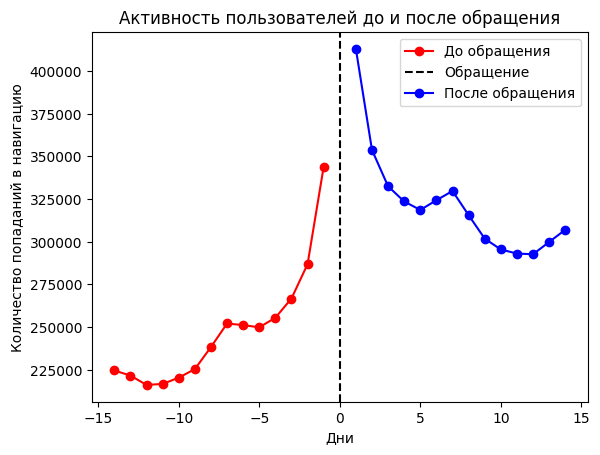

In [ ]:
plt.plot(result[result['days_diff'] < 0]['days_diff'], result[result['days_diff'] < 0]['user_count'], linestyle='-', marker='o', color='red', label='До обращения')
plt.axvline(x=0, color='black', linestyle='--', label='Обращение')
plt.plot(result[result['days_diff'] > 0]['days_diff'], result[result['days_diff'] > 0]['user_count'], linestyle='-', marker='o', color='blue', label='После обращения')
plt.xlabel("Дни")
plt.ylabel("Количество попаданий в навигацию")
plt.title("Активность пользователей до и после обращения")

plt.legend()

Гипотеза подтвердилась: после обращения пользователи чаще попадают в навигацию